# GRIP: THE SPARKS FOUNDATION

# Prediction using Supervised Learning

# Task:-1 of Data Science and Business Analytics Domain 
    ● Predict the percentage of an student based on the no. of study hours.
    ● This is a simple linear regression task as it involves just 2 variables.

# Author:- Sneha Bharti

# Import all the Important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Remove Outliers

In [7]:
def outlier_detection(df):
    ### Written by: SNEHA BHARTI
    # Detecting the Null or NaN values and remo ving them first
    # to ensure that the numerical columns can be detected correctly.
    r = []
    for col in df.columns:
        for i in df.index:
            if df.loc[i, col]=='Null' or df.loc[i, col] == np.nan:
                r.append(i)
    df = df.drop(list(set(r)))
    df = df.reset_index()
    df = df.drop('index', axis=1)
    
    # Finding out the columns having numerical values.
    num_cols = []
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_numeric(df[col])
                num_cols.append(col)
            except ValueError:
                pass
          
    # Removing the rows having values which can be called outliers
    # on the basis of their z-scores of >3 or <-3
    count = 0
    t = []
    for i in num_cols:
        z = np.abs(stats.zscore(df[i]))
        for j in range(len(z)):
            if z[j]>3 or z[j]<-3:
                t.append(j)
                count+=1
    df = df.drop(list(set(t)))
    df = df.reset_index()
    df = df.drop('index', axis=1)
    print(count)
    return df

In [8]:
df = outlier_detection(df)

0


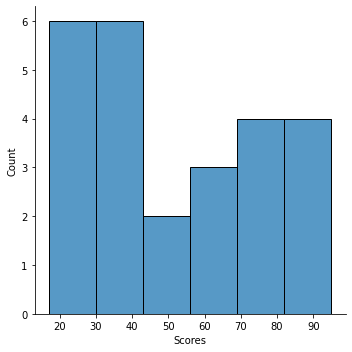

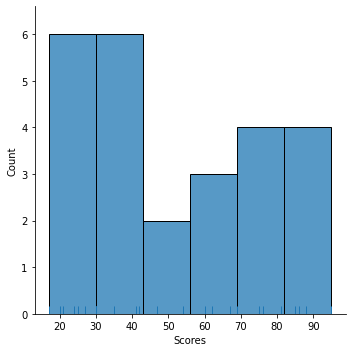

In [9]:
sns.displot(df["Scores"])
plt.show()

sns.displot(df["Scores"], kde=False, rug=True)
plt.show()

c:\users\sneha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'JointGrid' object has no attribute 'annotate'

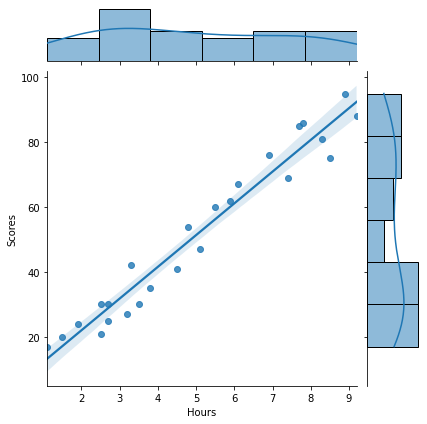

In [23]:
sns.jointplot(df['Hours'], df['Scores'], kind = "reg").annotate(stats.pearsonr)
plt.show()

# Performing Simple Linear Regression
Calculating the coeffeciants of the simple linear regression equation: y = B0 + B1.x (B1: Slope, B0: Intercept)¶

In [11]:
mean_x = np.mean(df['Hours'])
mean_y = np.mean(df['Scores'])
num = 0
den = 0
x = list(df['Hours'])
y = list(df['Scores'])
for i in range(len(df)):
    num += (x[i]-mean_x)*(y[i]-mean_y)
    den += (x[i]-mean_x)**2
B1 = num/den

In [12]:
B1

9.775803390787475

In [13]:
B0 = mean_y - B1*mean_x

In [14]:
B0

2.4836734053731746

# Making Predictions

In [15]:
df['predicted_Scores'] = B0 + B1*df['Hours']

In [16]:
df.head()

,Hours,Scores,predicted_Scores
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985


[]

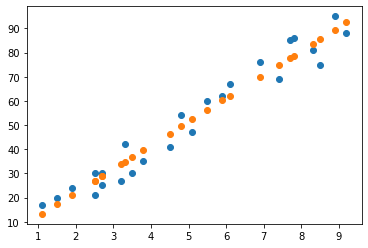

In [17]:
plt.scatter(df['Hours'], df['Scores'])
plt.scatter(df['Hours'], df['predicted_Scores'])
plt.plot()

# Prediction of given value: 9.25

In [18]:
B0 + B1*9.25

92.90985477015732

In [19]:
y = list(df['Scores'].values)
y_pred = list(df['predicted_Scores'].values)

# RMSE

In [20]:
s = sum([(y_pred[i] - y[i])**2 for i in range(len(df))])
rmse = (np.sqrt(s/len(df)))/mean_y

In [28]:
rmse

0.10439521325937494

# OLS Model

In [29]:
model = smf.ols('Scores ~ Hours', data = df)
model = model.fit()

In [30]:
df['pred_ols'] = model.predict(df['Hours'])

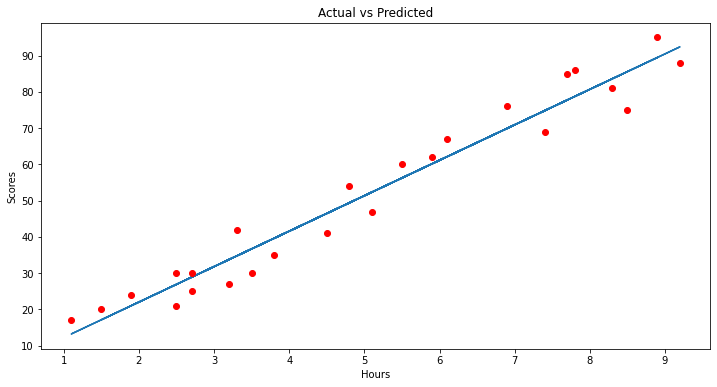

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(df['Hours'], df['pred_ols'])     # regression line
plt.plot(df['Hours'], df['Scores'], 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.show()

# We can observe that the predicted value for 9.25 hours is around 92
Additional conclusions: Categorical Prediction

In [32]:
cut_off = 40

In [33]:
df['Result'] = df['Scores']>=40

In [34]:
df.head()

,Hours,Scores,predicted_Scores,pred_ols,Result
0,2.5,21,26.923182,26.923182,False
1,5.1,47,52.340271,52.340271,True
2,3.2,27,33.766244,33.766244,False
3,8.5,75,85.578002,85.578002,True
4,3.5,30,36.698985,36.698985,False


# Plotting the given data's Results

c:\users\sneha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='count'>

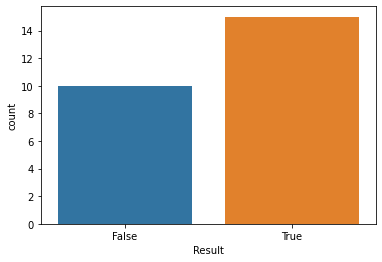

In [38]:
sns.countplot(df['Result'])

# Feature Engineering

In [39]:
feature = df['Hours'].values.reshape(-1, 1)
target = df['Result'].values

# Splitting the Data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state=0)

# Training the KNN Model

In [42]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Accuracy

In [43]:
knn.score(X_train, y_train)

0.9444444444444444

In [44]:
knn.score(X_test, y_test)

0.8571428571428571

# Predicting the outcomes

In [45]:
get_results = [[9.25]]

In [46]:
knn.predict(get_results)

array([ True])

In [47]:
knn.predict([[14]])

array([ True])

In [48]:
knn.predict([[3]])

array([False])